# Introduction

One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will use the tools and techniques you learned throughout this course to train a few linear regressions on a data set that you feel passionate about, select the regression that best suits your needs, and communicate insights you found from your modeling exercise.

This notebook is part of my IBM Machine Learning Professional Certificate.

## Importing Needed packages

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

## Load the Data

In [154]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [155]:
df['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [156]:
df.shape

(1067, 13)

## Understanding the Data

### `FuelConsumption.csv`:

I have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
      * 4WD/4X4 = Four-wheel drive
      * AWD = All-wheel drive
      * CNG = Compressed natural gas
      * FFV = Flexible-fuel vehicle
      * NGV = Natural gas vehicle
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
      * A = Automatic
      * AM = Automated manual
      * AS = Automatic with select shift
      * AV = Continuously variable
      * M = Manual
      * 3 – 10 = Number of gears
* **FUELTYPE**
     * X = Regular gasoline
     * Z = Premium gasoline
     * D = Diesel
     * E = Ethanol (E85)
     * N = Natural Gas
*   **FUEL CONSUMPTION in CITY(L/100 km)** --> City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)--> e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** --> Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating --> e.g. 182   --> low --> 0


## Data Exporation

Let's first have a descriptive exploration on our data.

In [157]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [158]:
df.dtypes.to_frame().rename(columns={0:'Data Type'})

,Data Type
MODELYEAR,int64
MAKE,object
MODEL,object
VEHICLECLASS,object
ENGINESIZE,float64
CYLINDERS,int64
TRANSMISSION,object
FUELTYPE,object
FUELCONSUMPTION_CITY,float64
FUELCONSUMPTION_HWY,float64


In [159]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Log transforming skewed variables

In [160]:
# Create a list of float colums to check for skewing
mask = df.dtypes != np.object
num_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[num_cols].skew()

In [161]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
FUELCONSUMPTION_HWY,1.263859
FUELCONSUMPTION_COMB,1.032592
FUELCONSUMPTION_CITY,0.900629
CYLINDERS,0.795754


In [162]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "CO2EMISSIONS": # this is in case if in our skew_col will be target variable CO2EMISSIONS
        continue
    df[col] = df[col].apply(np.log1p)

### One Hot Encoding

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where n is the number of categories.

In [163]:
# Select the object (string) columns
mask = df.dtypes == np.object
categorical_cols = df.columns[mask]

In [164]:
# Determine how many extra columns would be created
num_ohc_cols = (df[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 739 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

739

The total number of columns will be huge, so I decided to take only two categorical columns `FUELTYPE` and `VEHICLECLASS` which seems for me be reasonable choice and I would like to check with what number of total encoded columns I will end. 

In [165]:
# copy orginal dataframe
df2 = df.copy()

In [166]:
col = ['MODELYEAR', 'MAKE', 'MODEL', 'TRANSMISSION']
df2.drop(columns=col, axis=1, inplace=True)
df2.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,COMPACT,2.0,1.609438,Z,2.388763,2.041220,2.251292,33,196
1,COMPACT,2.4,1.609438,Z,2.501436,2.163323,2.360854,29,221
2,COMPACT,1.5,1.609438,Z,1.945910,1.916923,1.931521,48,136
3,SUV - SMALL,3.5,1.945910,Z,2.617396,2.312535,2.493205,25,255
4,SUV - SMALL,3.5,1.945910,Z,2.572612,2.272126,2.451005,27,244


In [167]:
df2.shape

(1067, 9)

In [168]:
# Select the object (string) columns
mask = df2.dtypes == np.object
categorical_cols = df2.columns[mask]

In [169]:
# Determine how many extra columns would be created
num_ohc_cols = (df2[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

18

Number of 18 new columns sounds better that 739 which I could produce if I will work with all string object. 

In [170]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df2.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [171]:
# Column difference is as calculated above

data_ohc.shape[1] - df2.shape[1]

18

In [172]:
df_final = data_ohc.copy()
df_final.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,VEHICLECLASS_0,VEHICLECLASS_1,VEHICLECLASS_2,...,VEHICLECLASS_10,VEHICLECLASS_11,VEHICLECLASS_12,VEHICLECLASS_13,VEHICLECLASS_14,VEHICLECLASS_15,FUELTYPE_0,FUELTYPE_1,FUELTYPE_2,FUELTYPE_3
0,2.0,1.609438,2.388763,2.041220,2.251292,33,196,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,1.609438,2.501436,2.163323,2.360854,29,221,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,1.609438,1.945910,1.916923,1.931521,48,136,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,1.945910,2.617396,2.312535,2.493205,25,255,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,1.945910,2.572612,2.272126,2.451005,27,244,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [173]:
df_final.shape

(1067, 27)

### Data Vizualization

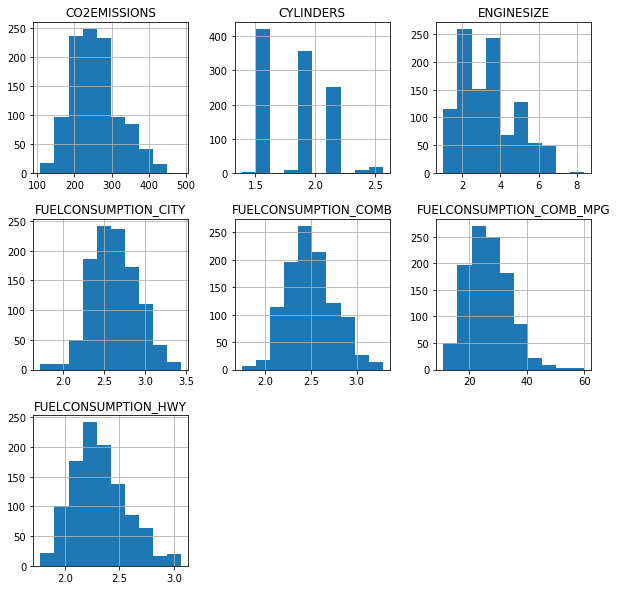

In [174]:
viz = df_final[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY',
                'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']]
viz.hist(figsize=(10,10))
plt.show()

As I did log transformation earlier my numerical data are normal distributed. 

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

Text(0, 0.5, 'Emission')

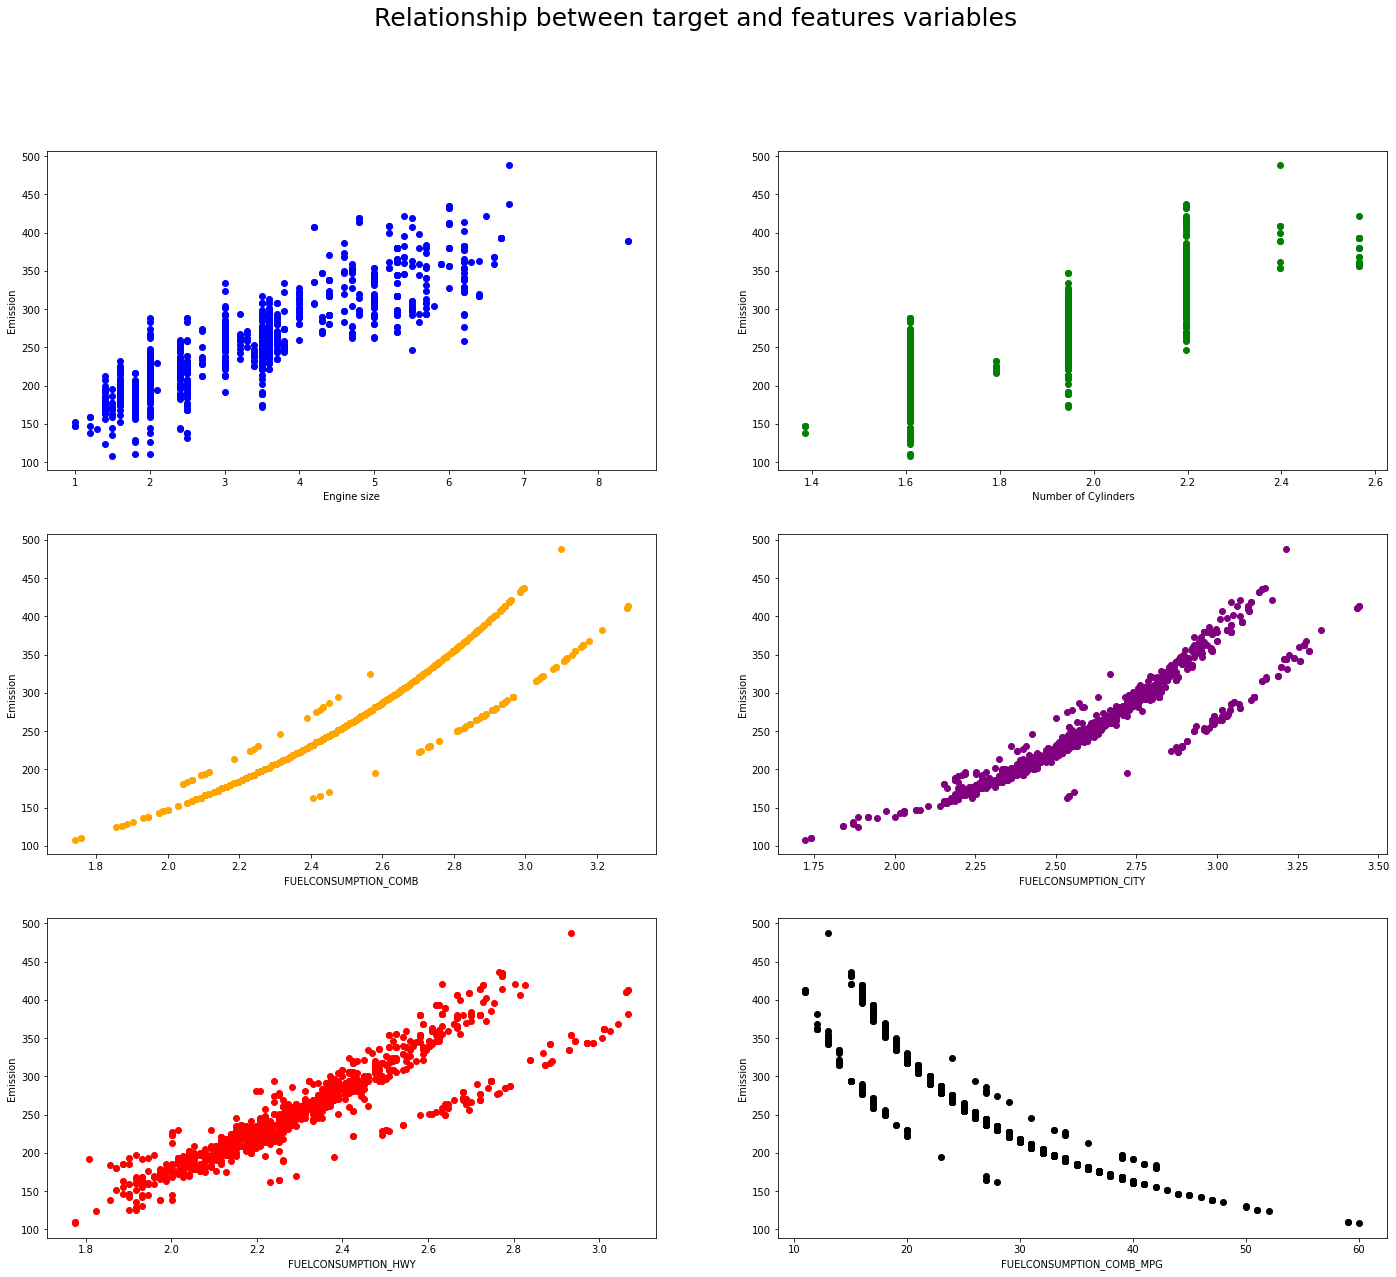

In [175]:
plt.figure(figsize=(24,20))
plt.suptitle('Relationship between target and features variables', size=25)

# first scatter
plt.subplot(3,2,1)
plt.scatter(df_final.ENGINESIZE, df_final.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# second scatter
plt.subplot(3,2,2)
plt.scatter(df_final.CYLINDERS, df_final.CO2EMISSIONS,  color='green')
plt.xlabel(" Number of Cylinders")
plt.ylabel("Emission")

# 3rd scatter 
plt.subplot(3,2,3)
plt.scatter(df_final.FUELCONSUMPTION_COMB, df_final.CO2EMISSIONS,  color='orange')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

# 4th scatter 
plt.subplot(3,2,4)
plt.scatter(df_final.FUELCONSUMPTION_CITY, df_final.CO2EMISSIONS,  color='purple')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

# 5th scatter
plt.subplot(3,2,5)
plt.scatter(df_final.FUELCONSUMPTION_HWY, df_final.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")

# 6th scatter 
plt.subplot(3,2,6)
plt.scatter(df_final.FUELCONSUMPTION_COMB_MPG, df_final.CO2EMISSIONS,  color='black')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [176]:
corr = df_final.corr()

Text(0.5, 1.0, 'Heatmap for all variables')

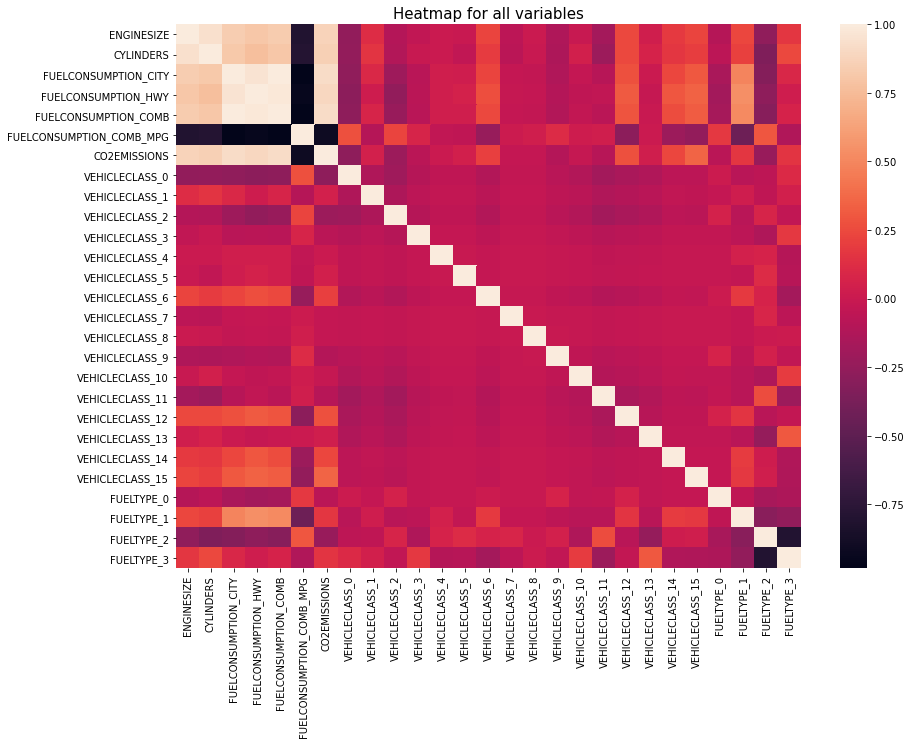

In [177]:
plt.figure(figsize=(14,10))
sns.heatmap(corr)
plt.title('Heatmap for all variables', size=15)

## Pre-processing 

### Generate X and target variable Y 

In [178]:
y_col = 'CO2EMISSIONS'

X = df_final.drop(y_col, axis=1)
y = df_final[y_col]

### RMSE function

function `rmse` takes in truth and prediction values and returns the root-mean-squared error.

In [179]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

### Linear Regression Model

#### Cross validation

In [180]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [181]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 2  3  5  6  7  8 10 11 12 13] 711
Test index: [ 0  1  4  9 16 17 23 30 32 33] 356

Train index: [ 0  1  3  4  5  7  8  9 10 11] 711
Test index: [ 2  6 12 15 19 24 25 26 27 29] 356

Train index: [ 0  1  2  4  6  9 12 15 16 17] 712
Test index: [ 3  5  7  8 10 11 13 14 18 20] 355



In [182]:
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.9957659413304515, 0.9938313150050585, 0.9960933527041865]

**How about scaling? Is the result will be better?**

In [183]:
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)

scores

[0.9957728309612668, 0.9938313150050582, 0.9960989397590061]

**For vanilla linear regression with no regularization, scaling actually doesn't matter for performance.**

#### `Pipeline` and `cross_val_predict`

In [184]:
s = StandardScaler()
lr = LinearRegression()


estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

`cross_val_predict` is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

In [185]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [186]:
r2_score(y, predictions)

0.9952706309216138

In [187]:
np.mean(scores) # almost identical!

0.9952343619084436

#### Linear Regression with train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [189]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
linear_r2 = r2_score(y_pred_s, y_test)
linear_r2

0.9954687232745988

In [190]:
linear_reg_rmse = rmse(y_test, y_pred_s)
print(linear_reg_rmse)

4.066631756734569


In [191]:
linear_mae = mean_absolute_error(y_test, y_pred_s)
linear_mae

2.541667581098224

In [192]:
linear_mse = mean_squared_error(y_test, y_pred_s)
linear_mse

16.53749384488209

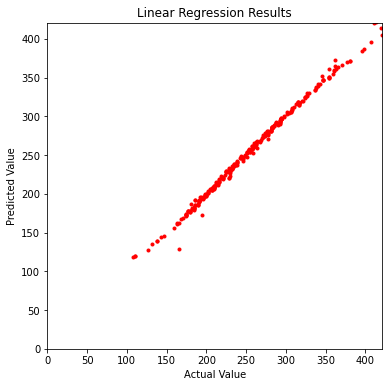

In [193]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred_s, color='red',
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Value', 
       ylabel='Predicted Value', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')
plt.show()

In [194]:
# pair the feature names with the coefficients
list(zip(X.columns, lr_s.coef_))

[('ENGINESIZE', 1.337410597793523),
 ('CYLINDERS', -0.8729883290032099),
 ('FUELCONSUMPTION_CITY', -13.494881339699266),
 ('FUELCONSUMPTION_HWY', -5.436178911240496),
 ('FUELCONSUMPTION_COMB', 131.61622924873762),
 ('FUELCONSUMPTION_COMB_MPG', 37.83692240072986),
 ('VEHICLECLASS_0', 0.548900622125031),
 ('VEHICLECLASS_1', 0.02403412530929594),
 ('VEHICLECLASS_2', -0.06490491227355089),
 ('VEHICLECLASS_3', 0.017504776544011058),
 ('VEHICLECLASS_4', -0.35058768748265123),
 ('VEHICLECLASS_5', -0.4243024995774005),
 ('VEHICLECLASS_6', -0.300863741056421),
 ('VEHICLECLASS_7', -0.19075368555007233),
 ('VEHICLECLASS_8', -0.11365748909968212),
 ('VEHICLECLASS_9', -0.14533274136694674),
 ('VEHICLECLASS_10', 0.08202882781235173),
 ('VEHICLECLASS_11', -0.7075049822481307),
 ('VEHICLECLASS_12', -0.0577093272858864),
 ('VEHICLECLASS_13', 0.46406985785895366),
 ('VEHICLECLASS_14', -0.18221332181076755),
 ('VEHICLECLASS_15', 1.1198486645200831),
 ('FUELTYPE_0', 7.643966126536576),
 ('FUELTYPE_1', -27

In [195]:
lr_s.intercept_

257.479892761394

## Hyperparameter tuning

Hyperparameter tuning involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that generalizes well outside of your sample.

### Lassso Regression

In [196]:
alphas = np.geomspace(0.001, 1.0, 20)
alphas

array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ])

In [197]:
# The code below tunes the alpha hyperparameter for Lasso regression
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [198]:
list(zip(alphas,scores))

[(0.001, 0.995255719405291),
 (0.0014384498882876629, 0.9952504159475843),
 (0.00206913808111479, 0.9952371447538183),
 (0.002976351441631319, 0.9952081575379459),
 (0.004281332398719396, 0.9951803164459696),
 (0.006158482110660267, 0.9951830063771825),
 (0.008858667904100823, 0.9951859630464215),
 (0.012742749857031334, 0.9951887222509407),
 (0.018329807108324356, 0.9951885085018991),
 (0.026366508987303583, 0.9951799553390182),
 (0.0379269019073225, 0.9951508307435817),
 (0.05455594781168517, 0.9950756847874418),
 (0.07847599703514611, 0.9949075897519697),
 (0.11288378916846883, 0.994545673389658),
 (0.1623776739188721, 0.9937831570045181),
 (0.23357214690901212, 0.9921749923771687),
 (0.3359818286283781, 0.9888915259939968),
 (0.4832930238571752, 0.987238596497235),
 (0.6951927961775606, 0.9866576605169078),
 (1.0, 0.985494476442807)]

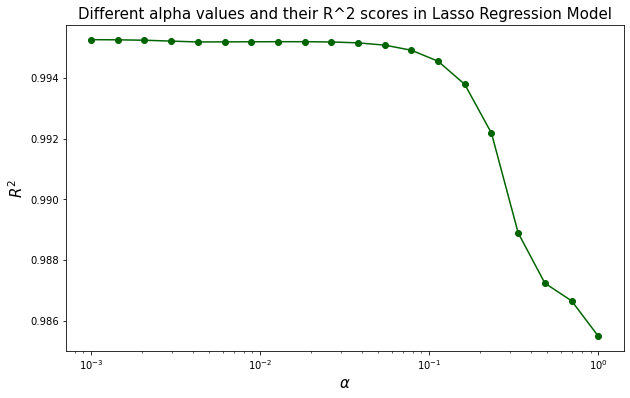

In [199]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o', color='darkgreen')
plt.xlabel('$\\alpha$', size=15)
plt.ylabel('$R^2$', size=15)
plt.title('Different alpha values and their R^2 scores in Lasso Regression Model', size=15)
plt.show()

### Add Polynomial Features to Pipeline and use Grid Search CV

#### Lasso 

In [200]:
# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [201]:
grid.fit(X, y)

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849.8178180323303, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961.732683448663, tolerance: 289.1396610407877
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 931.0153200106997, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508.24357748164357, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.85937346986634, tolerance: 289.1396610407877
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.99380559611984, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570.332570155412, tolerance: 289.1396610407877
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574.187342139089, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1432.5862363746332, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: 

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987.2564357033807, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933.5356575102842, tolerance: 289.1396610407877
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409.5636289504237, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1016.0743762744423, tolerance: 289.1396610407877
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1989.01514011759, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577.8193440429968, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1330.9020494400902, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.0045522036089, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.96644923917484, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([0.06      , 0.0764565 , 0.0974266 , 0.12414828, 0.15819905,
       0.2015891 , 0.25687994, 0.32733569, 0.41711568, 0.53152007,
       0.67730274, 0.86306993, 1.09978843, 1.40143288, 1.78581086,
       2.27561411, 2.89975814, 3.69508927, 4.70855982, 6.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [202]:
grid.best_score_, grid.best_params_

(0.9998203179178877,
 {'lasso_regression__alpha': 0.06, 'polynomial_features__degree': 3})

In [203]:
y_predict = grid.predict(X)

In [204]:
# This includes both in-sample and out-of-sample
lasso_r2 = r2_score(y, y_predict)
lasso_r2

0.9998869107482742

In [205]:
lasso_rmse = rmse(y, y_predict)
print(lasso_rmse)

0.6736069475203901


In [206]:
lasso_mae = mean_absolute_error(y, y_predict)
lasso_mae

0.5493160091861463

In [207]:
lasso_mse = mean_squared_error(y, y_predict)
lasso_mse

0.4537463197477375

#### Ridge

In [208]:
pf = PolynomialFeatures(degree=3)
alphas = np.geomspace(0.06, 6.0, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

In [209]:
list(zip(alphas,scores))

[(0.06, 0.9997220662985664),
 (0.07645649914218805, 0.9997345757902296),
 (0.0974266043513233, 0.999744260696229),
 (0.12414828486688738, 0.9997512628351912),
 (0.1581990539238215, 0.9997558152029304),
 (0.20158909717702692, 0.9997582039873327),
 (0.2568799439231636, 0.9997587105586583),
 (0.3273356868701111, 0.9997575530668209),
 (0.4171156777065363, 0.9997548437801241),
 (0.5315200742460495, 0.9997505698533989),
 (0.6773027350108134, 0.9997445967033842),
 (0.8630699329725978, 0.9997366879749078),
 (1.0997884264994613, 0.9997265346876775),
 (1.4014328814540729, 0.9997137870059382),
 (1.7858108649787907, 0.9996980836027237),
 (2.27561411443935, 0.9996790753171326),
 (2.8997581431430515, 0.9996564417991969),
 (3.6950892663961565, 0.9996299016710446),
 (4.708559822108766, 0.9995992175115995),
 (6.0, 0.9995641963572374)]

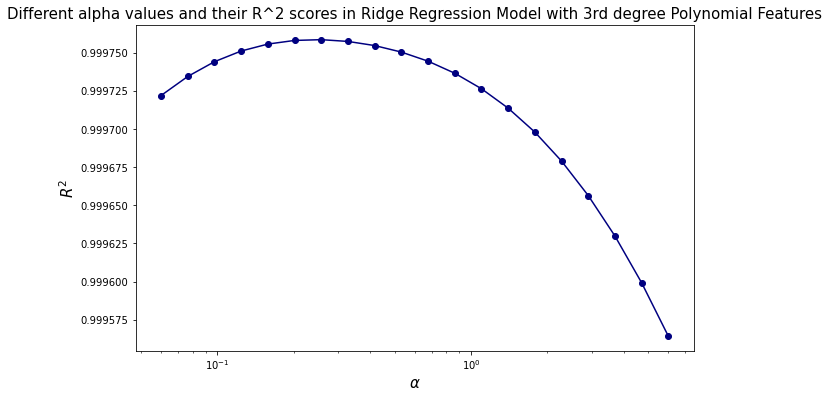

In [210]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o', color='navy')
plt.xlabel('$\\alpha$', size=15)
plt.ylabel('$R^2$', size=15)
plt.title('Different alpha values and their R^2 scores in Ridge Regression Model with 3rd degree Polynomial Features',
          size=15)
plt.show()

In [95]:
# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [96]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([0.06      , 0.0764565 , 0.0974266 , 0.12414828, 0.15819905,
       0.2015891 , 0.25687994, 0.32733569, 0.41711568, 0.53152007,
       0.67730274, 0.86306993, 1.09978843, 1.40143288, 1.78581086,
       2.27561411, 2.89975814, 3.69508927, 4.70855982, 6.        ])})

In [97]:
grid.best_score_, grid.best_params_

(0.9997569637930391,
 {'polynomial_features__degree': 3,
  'ridge_regression__alpha': 0.2568799439231636})

In [98]:
y_predict = grid.predict(X)

In [99]:
# This includes both in-sample and out-of-sample
ridge_r2 = r2_score(y, y_predict)
ridge_r2

0.9999861077397771

In [100]:
ridge_rmse = rmse(y, y_predict)
print(ridge_rmse)

0.2360925850317497


In [101]:
ridge_mae = mean_absolute_error(y, y_predict)
ridge_mae

0.1759113059308602

In [102]:
ridge_mse = mean_squared_error(y, y_predict)
ridge_mse

0.055739708706973964

In [103]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([0.        , 0.05026506, 0.00040552, ..., 0.04569496, 0.00667296,
       0.05902808])

##  Model Evaluation Metrics for Regression

**Mean Absolute Error (MAE)** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

**Mean Squared Error (MSE)** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

**Root Mean Squared Error (RMSE)** is the square root of Mean Squared error. It measures the standard deviation of residuals.

**R-squared (R2)** which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model. The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

Now, let's compare how different metrics looks like in different model: Linear Regression, Lasso and Ridge Regression

In [112]:
rmse_vals = [linear_reg_rmse, ridge_rmse, lasso_rmse]
r2_vals = [linear_r2, ridge_r2, lasso_r2]
mae_vals = [linear_mae, ridge_mae, lasso_mae]
mse_vals = [linear_mse, ridge_mse, lasso_mse]

labels = ['Linear', 'Ridge', 'Lasso']

metrics = {'MAE': mae_vals, 'MSE': mse_vals, 'RMSE': rmse_vals, 'R^2': r2_vals}
metrics_df = pd.DataFrame(metrics, index=labels)

metrics_df

,MAE,MSE,RMSE,R^2
Linear,2.541668,16.537494,4.066632,0.995469
Ridge,0.175911,0.055740,0.236093,0.999986
Lasso,0.549316,0.453746,0.673607,0.999887


## Model Evaluation - 3 different features

This model I created above have a high level of accuracy. 

Right now I would like to play around with data and see what will happend and what will change if I will chose for my model only 6 features insted of 27. 

In [123]:
# copy df_final dataframe and choose from them only few columns I will work on
df3 = df_final.copy()

In [124]:
df3 = df3[['ENGINESIZE', 'CYLINDERS', 'FUELTYPE_0', 'FUELTYPE_1', 'FUELTYPE_2', 'FUELTYPE_3', 'CO2EMISSIONS']]
df3.head()

,ENGINESIZE,CYLINDERS,FUELTYPE_0,FUELTYPE_1,FUELTYPE_2,FUELTYPE_3,CO2EMISSIONS
0,2.0,1.609438,0.0,0.0,0.0,1.0,196
1,2.4,1.609438,0.0,0.0,0.0,1.0,221
2,1.5,1.609438,0.0,0.0,0.0,1.0,136
3,3.5,1.945910,0.0,0.0,0.0,1.0,255
4,3.5,1.945910,0.0,0.0,0.0,1.0,244


In [125]:
# X and y selection
y_col = 'CO2EMISSIONS'

X = df3.drop(y_col, axis=1)
y = df3[y_col]

### Linear Regression

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

s = StandardScaler()
lr3 = LinearRegression()

X_train_s = s.fit_transform(X_train)
lr3.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr3.predict(X_test_s)
linear3_r2 = r2_score(y_pred_s, y_test)
linear3_r2

0.6738810427242581

In [131]:
linear3_rmse = rmse(y_test, y_pred_s)
print(linear3_rmse)

31.71775486709719


In [132]:
linear3_mae = mean_absolute_error(y_test, y_pred_s)
linear3_mae

24.25442221292463

In [133]:
linear3_mse = mean_squared_error(y_test, y_pred_s)
linear3_mse

1006.0159738092676

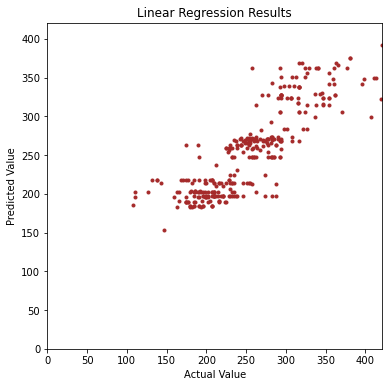

In [134]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, y_pred_s, color='brown',
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Value', 
       ylabel='Predicted Value', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')
plt.show()

In [150]:
list(zip(X.columns, lr3.coef_))

[('ENGINESIZE', 45.185173751365326),
 ('CYLINDERS', 13.998268133903228),
 ('FUELTYPE_0', 0.8182013435271867),
 ('FUELTYPE_1', -2.176875612570028),
 ('FUELTYPE_2', 1.647838447544006),
 ('FUELTYPE_3', -0.685996850471843)]

In [151]:
df['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

### Lasso

In [135]:
# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(X, y)

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22297.374776882585, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38052.43776417483, tolerance: 289.1396610407877
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.5989298137138, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304.2898825226584, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1872.6207428252092, tolerance: 275.5085011235955
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1517.4515555709368, tolerance: 290.98595302391
  model = cd_fast.enet_coordinate_descent(
C:\Users\pauli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             param_grid={'lasso_regression__alpha': array([0.06      , 0.0764565 , 0.0974266 , 0.12414828, 0.15819905,
       0.2015891 , 0.25687994, 0.32733569, 0.41711568, 0.53152007,
       0.67730274, 0.86306993, 1.09978843, 1.40143288, 1.78581086,
       2.27561411, 2.89975814, 3.69508927, 4.70855982, 6.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [136]:
grid.best_score_, grid.best_params_

(0.7909651641895863,
 {'lasso_regression__alpha': 0.06, 'polynomial_features__degree': 2})

In [137]:
y_predict = grid.predict(X)

In [138]:
# r^2 score 
lasso2_r2 = r2_score(y, y_predict)
lasso2_r2

0.7987702094914177

In [139]:
# RMSE
lasso2_rmse = rmse(y, y_predict)
print(lasso2_rmse)

28.414631623032708


In [140]:
# MAE
lasso2_mae = mean_absolute_error(y, y_predict)
lasso2_mae

21.636823630529612

In [141]:
# MSE
lasso2_mse = mean_squared_error(y, y_predict)
lasso2_mse

807.3912902726504

### Ridge

In [142]:
# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.06, 6.0, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([0.06      , 0.0764565 , 0.0974266 , 0.12414828, 0.15819905,
       0.2015891 , 0.25687994, 0.32733569, 0.41711568, 0.53152007,
       0.67730274, 0.86306993, 1.09978843, 1.40143288, 1.78581086,
       2.27561411, 2.89975814, 3.69508927, 4.70855982, 6.        ])})

In [143]:
grid.best_score_, grid.best_params_

(0.7908164603187764,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 0.5315200742460495})

In [144]:
y_predict = grid.predict(X)

In [145]:
# r^2 score 
ridge2_r2 = r2_score(y, y_predict)
ridge2_r2

0.7995835973565685

In [146]:
# RMSE
ridge2_rmse = rmse(y, y_predict)
print(ridge2_rmse)

28.357146299658286


In [147]:
# MAE
ridge2_mae = mean_absolute_error(y, y_predict)
ridge2_mae

21.62737969756012

In [148]:
# MSE
ridge2_mse = mean_squared_error(y, y_predict)
ridge2_mse

804.1277462602237

### Metrics 

In [152]:
rmse_vals = [linear3_rmse, ridge2_rmse, lasso2_rmse]
r2_vals = [linear3_r2, ridge2_r2, lasso2_r2]
mae_vals = [linear3_mae, ridge2_mae, lasso2_mae]
mse_vals = [linear3_mse, ridge2_mse, lasso2_mse]

labels = ['Linear', 'Ridge', 'Lasso']

metrics = {'MAE': mae_vals, 'MSE': mse_vals, 'RMSE': rmse_vals, 'R^2': r2_vals}
metrics_df2 = pd.DataFrame(metrics, index=labels)

metrics_df2

,MAE,MSE,RMSE,R^2
Linear,24.254422,1006.015974,31.717755,0.673881
Ridge,21.627380,804.127746,28.357146,0.799584
Lasso,21.636824,807.391290,28.414632,0.798770
